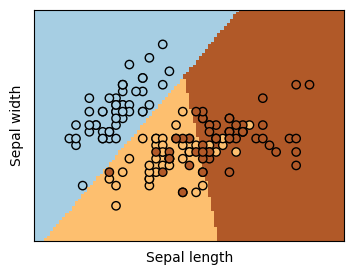

In [1]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.inspection import DecisionBoundaryDisplay

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression(C=1e5)
logreg.fit(X, Y)

_, ax = plt.subplots(figsize=(4, 3))
DecisionBoundaryDisplay.from_estimator(
    logreg,
    X,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    xlabel="Sepal length",
    ylabel="Sepal width",
    eps=0.5,
)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors="k", cmap=plt.cm.Paired)


plt.xticks(())
plt.yticks(())

plt.show()

In [6]:
from sklearn.datasets import load_iris # 사이킷런의 데이터셋에 있는 iris 데이터 로드
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

iris = load_iris()

columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'] # 컬럼 명
irisDF = pd.DataFrame(iris.data, columns = columns) # 데이터프레임 생성
irisDF['target'] = iris.target # 타깃변수 생성

irisDF.head(3) # 출력

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


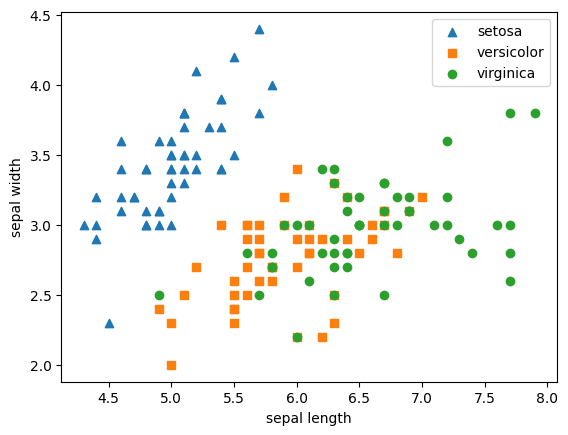

['^', 's', 'o']


In [7]:
# setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

# setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target별로 다른 모양으로 산점도로 표시
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target'] == i]['sepal_length']
    y_axis_data = irisDF[irisDF['target'] == i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])
    
plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

print(markers)


In [14]:
# 사이킷런의 StandardScaler를 이용해 평균이 0, 분산이 1인 표준 정규 분포로 근사
from sklearn.preprocessing import StandardScaler

features = irisDF.drop(columns=['target'],axis=1)
# Target 값을 제외한 모든 속성 값을 StandardScaler를 이용해 표준 정규 분포를 가지는 값들로 변환
iris_scaled = StandardScaler().fit_transform(features)
iris_scaled_df = pd.DataFrame(iris_scaled , columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

In [15]:
iris_scaled_df

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [16]:
# 사이킷런은 PCA 변환을 위해 PCA 클래스를 제공
from sklearn.decomposition import PCA

# PCA 클래스는 n_components라는 PCA로 변환할 차원의 수를 의미하는 생성 파라미터를 인자로 받음
# 이 경우 2
pca = PCA(n_components=2)

#fit()과 transform()을 호출해 PCA 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled_df)
print(iris_pca.shape)

(150, 2)


C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


In [17]:
iris_pca

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

In [20]:
# PCA 변환된 데이터의 칼럼 명을 각각 pca_component_1, pca_component_2로 명명
pca_columns = ['pca_component_1', 'pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca, columns = pca_columns)
irisDF_pca['target'] = iris.target
irisDF_pca.sort_values(by=['pca_component_1'],ascending=False)

,pca_component_1,pca_component_2,target
118,3.310696,0.017781,2
122,2.897651,0.413641,2
135,2.798770,0.856803,2
105,2.751873,0.800409,2
130,2.435954,0.259284,2
...,...,...,...
37,-2.527332,0.592293,0
42,-2.553638,-0.479101,0
32,-2.614948,1.793576,0
13,-2.633101,-0.961507,0


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

r_clf = RandomForestClassifier(random_state=156)

score = cross_val_score(r_clf, iris.data, iris.target,scoring="accuracy",cv=3)
print(score)
print(np.mean(score))

[0.98 0.94 0.96]
0.96


In [25]:
pca_x = irisDF_pca[["pca_component_1"]]

score_pca = cross_val_score(r_clf, pca_x, iris.target,scoring="accuracy",cv=3 )
print(score_pca)
print(np.mean(score_pca))

[0.9  0.94 0.9 ]
0.9133333333333332
